In [1]:
import numpy as np
from scipy.stats import zscore
import scipy.sparse as sps
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import glmnet as glmnet

In [3]:
model = glmnet.glm('poisson')

In [4]:
# Simulate data

# Dataset size
N = 10000
p = 100

# Coefficients
beta0 = np.random.normal(0.0, 1.0, 1)
beta = sps.rand(p,1,0.1)
beta = np.array(beta.todense())

# Training data
xr = np.random.normal(0.0, 1.0, [N,p])
yr = np.random.poisson(model.lmb(beta0, beta, zscore(xr)))

# Test data
xt = np.random.normal(0.0, 1.0, [N,p])
yt = np.random.poisson(model.lmb(beta0, beta, zscore(xt)))


In [15]:
# Set regularization parameters
reg_lambda = np.logspace(np.log(0.5), np.log(0.01), 100, base=np.exp(1))
alpha = 0.2

fit_params = dict()
fit_params['reg_lambda'] = [0.02]
fit_params['alpha'] = alpha

# Set optimization parameters
opt_params = dict()
opt_params['learning_rate'] = 1e-4
opt_params['max_iter'] = 1000
opt_params['p1'] = 0.9
opt_params['p2'] = 0.999

# Fit model to training data
fit = model.fit(zscore(xr),yr,fit_params,opt_params)


Lambda: 0.02

Converged
    Loss function: 6777.91830709
    dL/L: -0.000939355539569



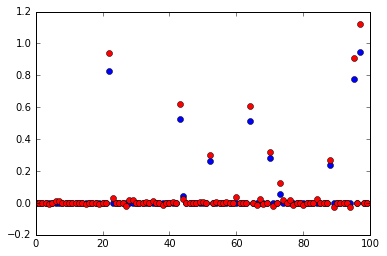

In [16]:
# Visualize estimated coefficients
plt.plot(beta[:], 'bo')
plt.hold(True)
plt.plot(fit[0]['beta'][:], 'ro')
plt.show()

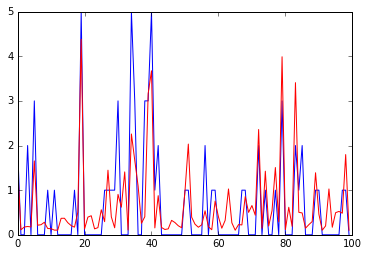

In [19]:
# Predict targets from test set
fitparams = fit[0]
yrhat = model.lmb(fitparams['beta0'], fitparams['beta'], zscore(xr))
ythat = model.lmb(fitparams['beta0'], fitparams['beta'], zscore(xt))

plt.plot(yt[:100])
plt.hold(True)
plt.plot(ythat[:100], 'r')
plt.show()

In [20]:
# Compute pseudo-R2s
R2r = model.pseudo_R2(yr, yrhat, np.mean(yr))
R2t = model.pseudo_R2(yt, ythat, np.mean(yr))
print R2r, R2t

0.409128748053 0.398234631766
